In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
import sys

sys.path.append('../')

from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import SimpleITK as sitk
import skimage.io as io
from torch.utils.data import Dataset, DataLoader
import nibabel
from scipy import ndimage
import time
import torch
import torch.nn as nn
import fire
import time
import pydicom
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread 

In [2]:
def read_img(path):
    img = sitk.ReadImage(path)
    data = sitk.GetArrayFromImage(img)
    return data

#显示一个系列图
def show_img(data):
    for i in range(data.shape[0]):
        io.imshow(data[i,:,:], cmap = 'gray')
        print(i)
        print('=====>value sum of this img is {}'.format(np.sum(data[i,:,:])))
        io.show()
        
def show_2img(data1,data_mask):
    for i in range(data1.shape[0]):
        print(i)        
        fig, axes = plt.subplots(1, 2, figsize=(512, 384))
        ax0, ax1 = axes.ravel()
        ax0.imshow(data1[i,:,:], cmap = 'gray')
        ax0.set_title("Raw phase1")
 
        ax1.imshow(data_mask[i, :, :], cmap = 'gray')
        ax1.set_title("After Mask")

#         plt.figure(figsize)
#         ax1 = plt.subplot(1,2,1)
#         plt.imshow(data1[i,:,:])
#         ax2 = plt.subplot(122)
#         plt.imshow(mask_phase1[i,:,:])

def diff_phase(data1,data2):
    diff = data1 - data2
    diff = diff - diff.min()
    diff_array = np.array(diff,dtype=np.float32)
    cal = 0
    print('data1 array:\t', data1.sum())
    print('data1 array2\t', data2.sum())
    print('diff array:\t', diff_array.sum())
    for i in range(diff.shape[0]):
        if np.sum(diff_array[i,:,:]) == 0:
               cal = cal + 1
    print('There are {} zero layers in diff'.format(cal))
    return diff

In [3]:
def add_mask(data,mask):
    data_array = np.array(data, dtype=np.float32)
    mask_array = np.array(mask,dtype=np.float32)
    
    mask_depth = mask.shape[0]
    mask_array = mask[mask_depth//2:,:,:]
    data_after_mask = data*mask_array
    
    cal = 0
    for i in range(data_after_mask.shape[0]):
        if np.sum(data_after_mask[i,:,:]) > 0:
               cal = cal + 1
    print('There are {} none-zero layers after mask'.format(cal))
    
    return data_after_mask

0
=====>value sum of this img is 22351518


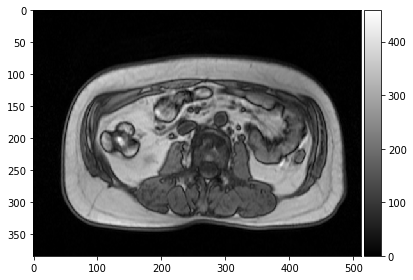

1
=====>value sum of this img is 25050699


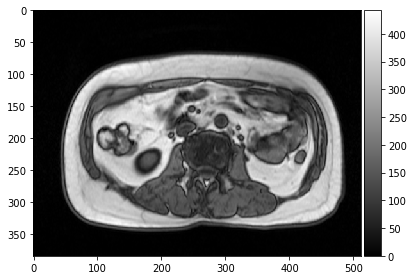

2
=====>value sum of this img is 25265328


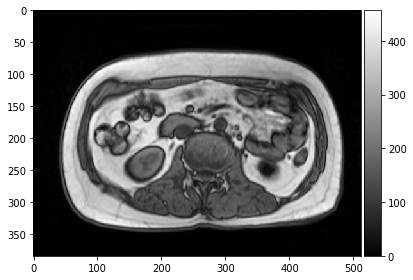

3
=====>value sum of this img is 25448174


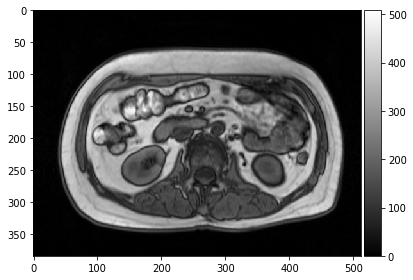

4
=====>value sum of this img is 25590847


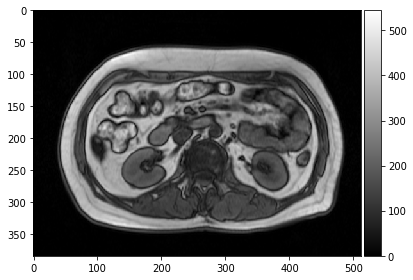

5
=====>value sum of this img is 25635097


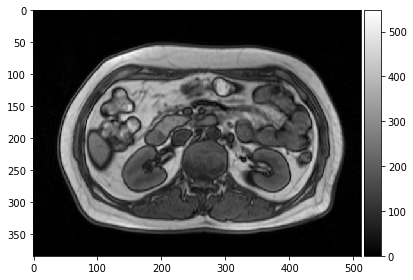

6
=====>value sum of this img is 25593963


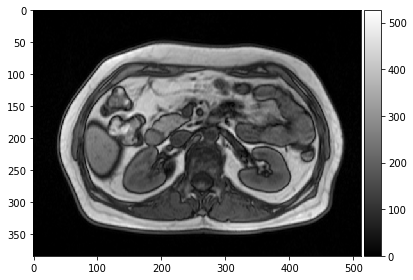

7
=====>value sum of this img is 25476252


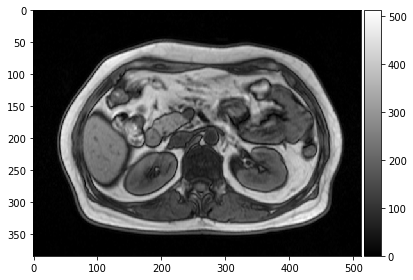

8
=====>value sum of this img is 24813632


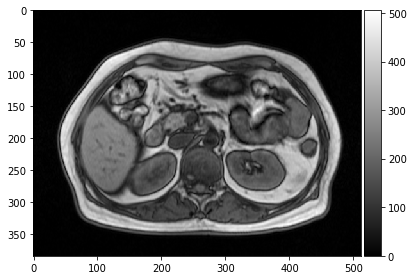

9
=====>value sum of this img is 25027087


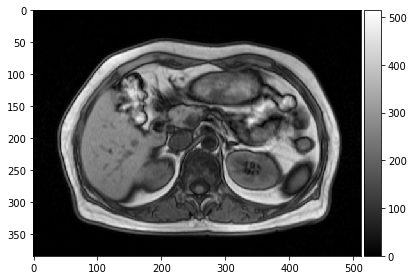

10
=====>value sum of this img is 23681082


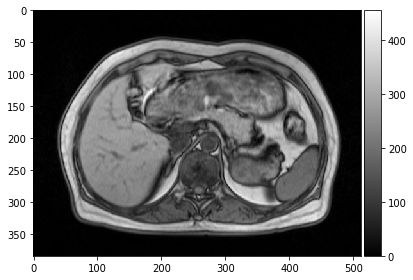

11
=====>value sum of this img is 22722929


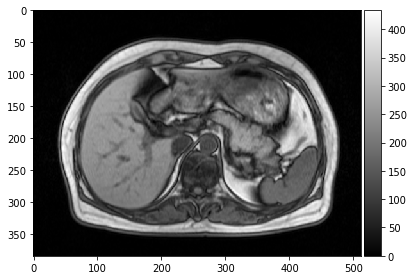

12
=====>value sum of this img is 22829895


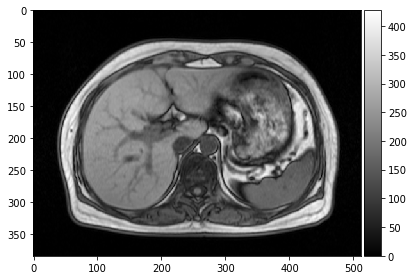

13
=====>value sum of this img is 23095262


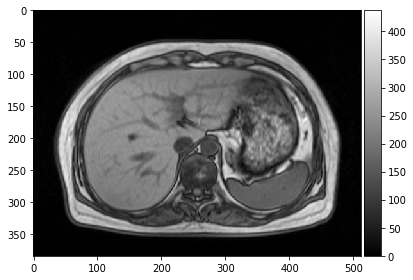

14
=====>value sum of this img is 24091364


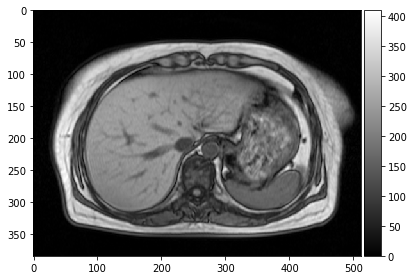

15
=====>value sum of this img is 25155102


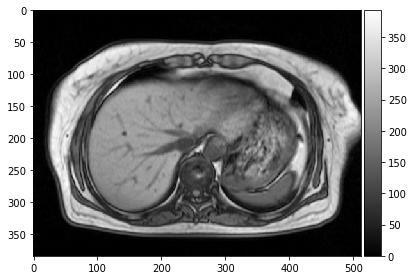

16
=====>value sum of this img is 23470540


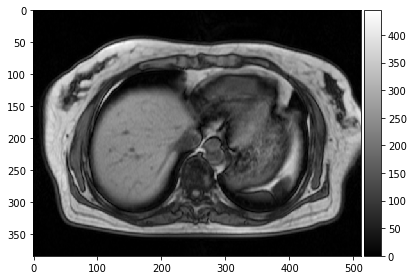

17
=====>value sum of this img is 20964284


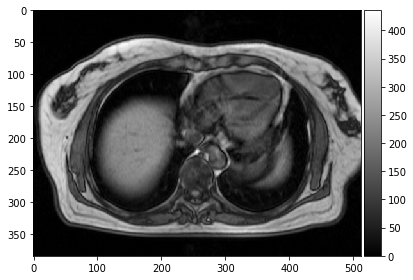

18
=====>value sum of this img is 18330356


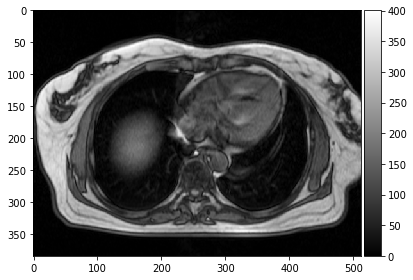

19
=====>value sum of this img is 17996853


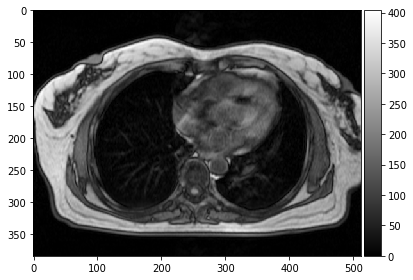

There are 5 none-zero layers after mask
There are 5 none-zero layers after mask


In [11]:
#raw phase nii.gz
# pid = '1.3.12.2.1107.5.2.30.25245.20150912153422907799860.0.0.0'
pid = '1.3.12.2.1107.5.2.30.25245.2012080414225980534987549.0.0.0' #mask与肝不匹配
# pid = '1.3.12.2.1107.5.2.18.52001.2014111920254623363975828.0.0.0'
# pid = '1.3.12.2.1107.5.2.30.25245.201410271542142183864438.0.0.0'
# pid = '1.3.12.2.1107.5.2.30.25245.2012081614345230066229795.0.0.0'
# pid = '1.3.12.2.1107.5.2.30.25245.2017011118441357024524670.0.0.0'
# pid = '1.3.12.2.1107.5.2.30.25245.2012051912002612659469214.0.0.0'

data1_path = '/home/zhangwd/code/work/FattyLiver_Solution/data/experiment_0/0.ori/{}/echo_1.nii.gz'.format(pid)
data1 = read_img(data1_path)
show_img(data1)

data2_path = '/home/zhangwd/code/work/FattyLiver_Solution/data/experiment_0/0.ori/{}/echo_2.nii.gz'.format(pid)
data2 = read_img(data2_path)
# show_img(data2)
    
mask_path = '/home/zhangwd/code/work/FattyLiver_Solution/data/seg_task/renamed_masks/{}.mha'.format(pid)
mask = read_img(mask_path)
# show_img(mask)

mask_phase1 = add_mask(data1,mask)
# show_img(mask_phase1)

mask_phase2 = add_mask(data2,mask)
# show_img(mask_phase2)

# show_2img(data1,mask_phase1)

# raw_diff = diff_phase(data1,data2)
# show_img(raw_diff)

# mask_diff = add_mask(diff_phase(data1,data2),mask)#先diff再mask
# mask_diff = diff_phase(add_mask(data1,mask),add_mask(data2,mask))#目前的做法，先分别mask再diff
# show_img(mask_diff)